In [1]:
from csv import reader
import numpy as np

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
print("size of sonar dataset = {}".format(np.asarray(dataset).shape))

dataset_X=list()
dataset_y=list()
for i in range(len(dataset)):
    dataset_X.append(dataset[i][:-1])
    dataset_y.append(dataset[i][-1])




size of sonar dataset = (208, 61)


In [20]:
import numpy as np
x=(np.arange(50))
x[0:5]

array([0, 1, 2, 3, 4])

(208, 50)

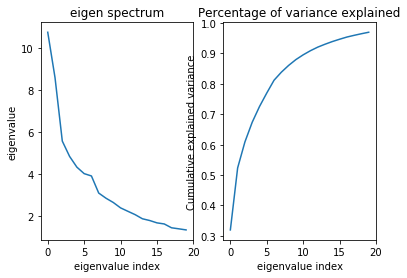

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

ncomp=20

pca=PCA(n_components=ncomp)
pca.fit(dataset_X)
#print(pca.explained_variance_ratio_)  
plt.subplot(121)
#print(pca.singular_values_)  
plt.plot(np.arange(ncomp), pca.singular_values_[0:ncomp])
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue')
plt.title('eigen spectrum')
plt.subplot(122)
plt.plot(np.arange(ncomp), np.cumsum(pca.explained_variance_ratio_[0:ncomp]))
plt.xlabel('eigenvalue index')
plt.ylabel('Cumulative explained variance')
plt.title('Percentage of variance explained')
pca=PCA(n_components=50)
pca.fit(dataset_X)
transformed_dataset_X=pca.transform(dataset_X)
transformed_dataset_X.shape
#pca2.n_components_

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=100, max_depth=None, random_state=0, min_samples_split=2, criterion='gini')
scores = cross_val_score(clf, dataset_X, dataset_y, cv=10)
print("Mean Accuracy and 95 percent confidence interval ExtraTrees: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))  

clf = ExtraTreesClassifier(n_estimators=100, max_depth=None, random_state=0, min_samples_split=2, criterion='gini')
scores = cross_val_score(clf, transformed_dataset_X, dataset_y, cv=10)
print("Mean Accuracy and 95 percent confidence on Transformed data: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))  

Mean Accuracy and 95 percent confidence interval ExtraTrees: 0.69 (+/- 0.23)
Mean Accuracy and 95 percent confidence on Transformed data: 0.68 (+/- 0.17)


In [139]:
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=ncomp, kernel='rbf',gamma=.35/ncomp)
X_transformed = transformer.fit_transform(dataset_X)
#X_transformed.shape
clf2 = ExtraTreesClassifier(n_estimators=10, max_depth=None, random_state=0, min_samples_split=2, criterion='gini')
scores = cross_val_score(clf, X_transformed, dataset_y, cv=10)
print("Mean Accuracy and 95 percent confidence interval ExtraTrees: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() *2))  



Mean Accuracy and 95 percent confidence interval ExtraTrees: 0.61 (+/- 0.26)


In [140]:

Acc = list()
for Gamma in np.linspace(0.,3.,15):
    transformer = KernelPCA(n_components=ncomp, kernel='rbf',gamma=Gamma/ncomp)
    X_transformed = transformer.fit_transform(dataset_X)
    #X_transformed.shape
    clf2 = ExtraTreesClassifier(n_estimators=10, max_depth=None, random_state=0, min_samples_split=2, criterion='gini')
    scores = cross_val_score(clf, X_transformed, dataset_y, cv=10)
    print('Gamma ={}'.format(Gamma))
    Acc.append(scores.mean())


gamma =0.0
gamma =0.21428571428571427
gamma =0.42857142857142855
gamma =0.6428571428571428
gamma =0.8571428571428571
gamma =1.0714285714285714
gamma =1.2857142857142856
gamma =1.5
gamma =1.7142857142857142
gamma =1.9285714285714284
gamma =2.142857142857143
gamma =2.357142857142857
gamma =2.571428571428571
gamma =2.7857142857142856
gamma =3.0


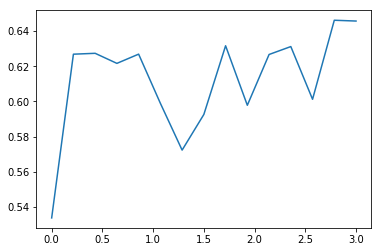

In [141]:

plt.plot(np.linspace(0.,3.,15),Acc)